In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Simple Linear Relationship Dataset</h2>
<h4>Hands-on: Linear Regression with AWS Machine Learning Service</h4>
Input Features: x<br>
Target Feature: y_noisy<br>
Objective: Predict y_noisy for a given x<br>

In [2]:
# Function y = 5*x + 8.  We will add random noise later
def straight_line(x):
    return 5*x + 8

In [3]:
straight_line(25)

133

In [4]:
straight_line(1.254)

14.27

In [5]:
np.random.seed(5)
samples = 150
x_vals = pd.Series(np.random.rand(samples)*20)
y_vals = x_vals.map(straight_line)
# Add random noise
y_noisy_vals = y_vals + np.random.randn(samples) * 3

In [6]:
df = pd.DataFrame({'x':x_vals,'y':y_vals, 'y_noisy':y_noisy_vals})

In [7]:
df.head()

,x,y,y_noisy
0,4.439863,30.199317,27.659911
1,17.414646,95.073231,102.635654
2,4.134383,28.671916,24.974757
3,18.372218,99.861091,102.041951
4,9.768224,56.841119,56.978985


In [8]:
# Correlation will indicate how strongly features are related to the output
df.corr()

,x,y,y_noisy
x,1.000000,1.000000,0.995633
y,1.000000,1.000000,0.995633
y_noisy,0.995633,0.995633,1.000000


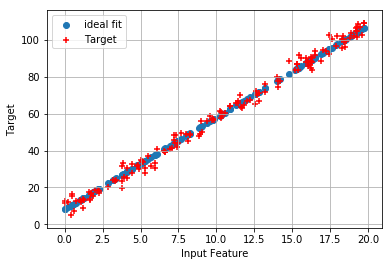

In [9]:
plt.scatter(x=df.x,y=df.y,label='ideal fit')
plt.scatter(x=df.x,y=df.y_noisy, color='r',marker='+',label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()

In [10]:
# Save all data
df.to_csv('linear_all.csv',index=False,
          columns=['x','y','y_noisy'])

## Training and Validation Set
### Target Variable as first column followed by input features: y_noisy, x
### Training, Validation files do not have a column header

In [11]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [12]:
df.head()

,x,y,y_noisy
82,16.871099,92.355497,88.563247
134,1.268020,14.340098,13.212976
114,10.534351,60.671757,60.304166
42,17.409662,95.048309,92.380046
109,19.072610,103.363051,102.040835


In [13]:
rows = df.shape[0]
train = int(.7 * rows)
test = int(.3 * rows)

In [14]:
rows, train, test

(150, 105, 45)

In [15]:
# Write Training Set
df[:train].to_csv('linear_train.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=['y_noisy','x'])

In [16]:
# Write Validation Set
df[train:].to_csv('linear_validation.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=['y_noisy','x'])